In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score, KFold
from sklearn.linear_model import LogisticRegression


In [ ]:
iris = sns.load_dataset("iris")


In [ ]:
iris

In [ ]:
shape=iris.shape[0]

In [ ]:
folds=3
split=shape//folds


In [ ]:
split

50

In [ ]:
data=iris.values
data

array([[5.1, 3.5, 1.4, 0.2, 'setosa'],
       [4.9, 3.0, 1.4, 0.2, 'setosa'],
       [4.7, 3.2, 1.3, 0.2, 'setosa'],
       [4.6, 3.1, 1.5, 0.2, 'setosa'],
       [5.0, 3.6, 1.4, 0.2, 'setosa'],
       [5.4, 3.9, 1.7, 0.4, 'setosa'],
       [4.6, 3.4, 1.4, 0.3, 'setosa'],
       [5.0, 3.4, 1.5, 0.2, 'setosa'],
       [4.4, 2.9, 1.4, 0.2, 'setosa'],
       [4.9, 3.1, 1.5, 0.1, 'setosa'],
       [5.4, 3.7, 1.5, 0.2, 'setosa'],
       [4.8, 3.4, 1.6, 0.2, 'setosa'],
       [4.8, 3.0, 1.4, 0.1, 'setosa'],
       [4.3, 3.0, 1.1, 0.1, 'setosa'],
       [5.8, 4.0, 1.2, 0.2, 'setosa'],
       [5.7, 4.4, 1.5, 0.4, 'setosa'],
       [5.4, 3.9, 1.3, 0.4, 'setosa'],
       [5.1, 3.5, 1.4, 0.3, 'setosa'],
       [5.7, 3.8, 1.7, 0.3, 'setosa'],
       [5.1, 3.8, 1.5, 0.3, 'setosa'],
       [5.4, 3.4, 1.7, 0.2, 'setosa'],
       [5.1, 3.7, 1.5, 0.4, 'setosa'],
       [4.6, 3.6, 1.0, 0.2, 'setosa'],
       [5.1, 3.3, 1.7, 0.5, 'setosa'],
       [4.8, 3.4, 1.9, 0.2, 'setosa'],
       [5.0, 3.0, 1.6, 0.

In [ ]:
mean_values = np.mean(data, axis=0)
median_values = np.median(data, axis=0)
std_dev_values = np.std(data, axis=0)

print("Mean Values:")
print(mean_values)
print("\nMedian Values:")
print(median_values)
print("\nStandard Deviation Values:")
print(std_dev_values)

Mean Values:
[5.84333333 3.05733333 3.758      1.19933333]

Median Values:
[5.8  3.   4.35 1.3 ]

Standard Deviation Values:
[0.82530129 0.43441097 1.75940407 0.75969263]


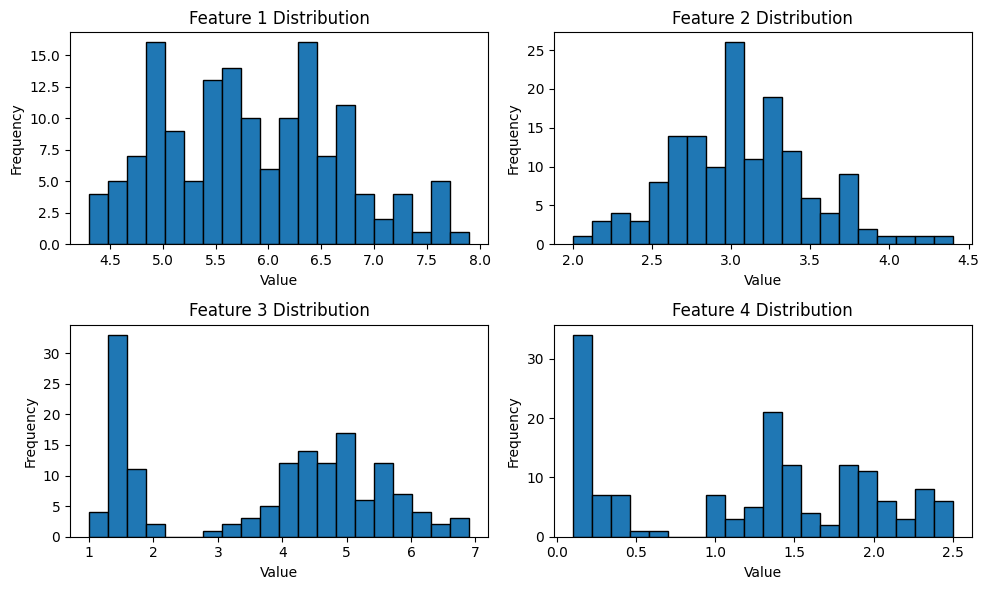

In [ ]:
plt.figure(figsize=(10, 6))
for i in range(data.shape[1]):
    plt.subplot(2, 2, i+1)
    plt.hist(data[:, i], bins=20, edgecolor='black')
    plt.title(f"Feature {i+1} Distribution")
    plt.xlabel("Value")
    plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

In [ ]:
data_parts= np.array_split(data,3)

In [ ]:
data_parts[0]

In [ ]:
folds=3
split=50

In [ ]:
testfold_data = {}
trainfold_data = {}


In [ ]:
for i in range(folds):
    # Define the indices for the testing fold
    start_idx = i * split
    end_idx = (i + 1) * split

    # Create the testing fold
    testfold_data[i] = data[start_idx:end_idx]

    # Create the training fold by excluding the testing indices
    trainfold_data[i] = np.concatenate((data[:start_idx], data[end_idx:]))

    # Print the shapes of training and testing data for this fold
    print(f"Fold {i + 1}: Train shape: {trainfold_data[i].shape}, Test shape: {testfold_data[i].shape}")

Fold 1: Train shape: (100, 5), Test shape: (50, 5)
Fold 2: Train shape: (100, 5), Test shape: (50, 5)
Fold 3: Train shape: (100, 5), Test shape: (50, 5)


In [ ]:

from sklearn.metrics import accuracy_score
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

# Load the Iris dataset
iris = load_iris()
data = iris.data
labels = iris.target

folds = 5  # Number of folds
split = len(data) // folds  # Calculate the size of each fold

# Initialize arrays to store training and testing data
testfold_data = {}
trainfold_data = {}
testfold_labels = {}
trainfold_labels = {}

for i in range(folds):
    # Define the indices for the testing fold
    start_idx = i * split
    end_idx = (i + 1) * split

    # Create the testing fold
    testfold_data[i] = data[start_idx:end_idx]
    testfold_labels[i] = labels[start_idx:end_idx]

    # Create the training fold by excluding the testing indices
    train_indices = np.concatenate((np.arange(start_idx), np.arange(end_idx, len(data))))
    trainfold_data[i] = data[train_indices]
    trainfold_labels[i] = labels[train_indices]

    # Train a model on the training fold
    model = LogisticRegression(max_iter=1000)  # Increase max_iter due to dataset size
    model.fit(trainfold_data[i], trainfold_labels[i])

    # Predict on the testing fold
    predictions = model.predict(testfold_data[i])

    # Evaluate the model
    accuracy = accuracy_score(testfold_labels[i], predictions)
    print(f"Fold {i + 1}: Accuracy: {accuracy:.2f}")

Fold 1: Accuracy: 1.00
Fold 2: Accuracy: 1.00
Fold 3: Accuracy: 0.87
Fold 4: Accuracy: 0.93
Fold 5: Accuracy: 0.83


In [ ]:

# Load the Iris dataset from Seaborn
iris = sns.load_dataset("iris")

# Define features and target
X = iris.drop("species", axis=1)
y = iris["species"]

# Create a logistic regression model
model = LogisticRegression()

# Create a k-fold cross-validation generator
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Perform k-fold cross-validation
scores = cross_val_score(model, X, y, cv=kf, scoring='accuracy')

# Print the accuracy scores for each fold
for fold_num, score in enumerate(scores, start=1):
    print(f"Fold {fold_num} Accuracy:", score)

# Print the average accuracy across all folds
average_accuracy = np.mean(scores)
print("Average Accuracy:", average_accuracy)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Fold 1 Accuracy: 1.0
Fold 2 Accuracy: 1.0
Fold 3 Accuracy: 0.9333333333333333
Fold 4 Accuracy: 0.9666666666666667
Fold 5 Accuracy: 0.9666666666666667
Average Accuracy: 0.9733333333333334
